# Craft a Story from a Dataset Rubric

The goal of this project is to try to find out the features that show the largest importance with price of shoes. We'll do this by analysing a number of features, specifically colours and price.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#%qtconsole

In [30]:
df = pd.read_csv('shoes.csv')
df.head()

C:\Users\bryan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11,13,15,19,21,27,28,33,34,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,asins,brand,categories,colors,dateAdded,dateUpdated,descriptions,dimension,ean,...,prices.shipping,prices.size,prices.sourceURLs,quantities,reviews,sizes,skus,sourceURLs,upc,weight
0,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,NaN,...,NaN,L,https://www.overstock.com/Worldstock-Fair-Trad...,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",NaN,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN
1,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,NaN,...,NaN,M,https://www.overstock.com/Worldstock-Fair-Trad...,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",NaN,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN
2,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,NaN,...,NaN,S,https://www.overstock.com/Worldstock-Fair-Trad...,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",NaN,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN
3,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,NaN,...,NaN,XL,https://www.overstock.com/Worldstock-Fair-Trad...,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",NaN,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN
4,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,NaN,...,NaN,XL,https://www.overstock.com/Worldstock-Fair-Trad...,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",NaN,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33801 entries, 0 to 33800
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   33801 non-null  object 
 1   asins                2422 non-null   object 
 2   brand                32817 non-null  object 
 3   categories           33801 non-null  object 
 4   colors               19844 non-null  object 
 5   dateAdded            33801 non-null  object 
 6   dateUpdated          33801 non-null  object 
 7   descriptions         28425 non-null  object 
 8   dimension            1177 non-null   object 
 9   ean                  9778 non-null   float64
 10  features             27181 non-null  object 
 11  imageURLs            22309 non-null  object 
 12  keys                 33801 non-null  object 
 13  manufacturer         9279 non-null   object 
 14  manufacturerNumber   31434 non-null  object 
 15  merchants            15382 non-null 

In [32]:
col_list = []

for col in df.columns.tolist():
    if df[col].count() < df.shape[0]*.50:
        col_list.append(col)
        
df = df.drop(col_list,axis=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33801 entries, 0 to 33800
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  33801 non-null  object 
 1   brand               32817 non-null  object 
 2   categories          33801 non-null  object 
 3   colors              19844 non-null  object 
 4   dateAdded           33801 non-null  object 
 5   dateUpdated         33801 non-null  object 
 6   descriptions        28425 non-null  object 
 7   features            27181 non-null  object 
 8   imageURLs           22309 non-null  object 
 9   keys                33801 non-null  object 
 10  manufacturerNumber  31434 non-null  object 
 11  name                33801 non-null  object 
 12  prices.amountMin    33801 non-null  float64
 13  prices.amountMax    33801 non-null  float64
 14  prices.color        17421 non-null  object 
 15  prices.currency     33801 non-null  object 
 16  pric

In [34]:
df['brand'].value_counts()

Journee Collection    1401
Ralph Lauren           991
Skechers               799
Propet                 796
Nike                   649
                      ... 
MALONE SOULIERS          1
Avanti                   1
Oneal                    1
Pedi Couture             1
MELLOW WALK              1
Name: brand, Length: 1360, dtype: int64

In [35]:
# Some small errors in naming of brands : 
df[(df['brand'] == 'PUMA') | (df['brand'] == 'Puma')]['brand'] = 'Puma'

df[(df['brand'] == 'Lauren Ralph Lauren') | (df['brand'] == 'Ralph Lauren')]['brand'] = 'Ralph Lauren'

df[(df['brand'] == 'MICHAEL Michael Kors') | (df['brand'] == 'Michael Kors')]['brand'] = 'Michael Kors'

df[(df['brand'] == 'Pleaser Shoes') | (df['brand'] == 'PleaserUSA') | (df['brand'] == 'Pleaser')]['brand'] = 'Pleaser'

<ipython-input-35-011828eb721b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(df['brand'] == 'PUMA') | (df['brand'] == 'Puma')]['brand'] = 'Puma'
<ipython-input-35-011828eb721b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(df['brand'] == 'Lauren Ralph Lauren') | (df['brand'] == 'Ralph Lauren')]['brand'] = 'Ralph Lauren'
<ipython-input-35-011828eb721b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [36]:
df[['prices.amountMin','prices.amountMax']].head(3)

,prices.amountMin,prices.amountMax
0,62.99,62.99
1,62.99,62.99
2,62.99,62.99


In [37]:
def mean_price(df):
    df['prices.mean'] = float((df['prices.amountMin']+df['prices.amountMax']))*0.5
    return df

df = df.apply(mean_price,axis=1)

df[['prices.amountMin','prices.amountMax','prices.mean']].head()

df.drop(['prices.amountMin','prices.amountMax'],axis=1,inplace=True)

In [38]:
df['prices.currency'].value_counts()

USD    32680
CAD     1008
EUR      101
AUD       11
GBP        1
Name: prices.currency, dtype: int64

In [39]:
def curr_conv_price(df):
    if df['prices.currency'] == 'EUR':
        df['prices.mean'] = df['prices.mean']*1.21
    elif df['prices.currency'] == 'GBP':
        df['prices.mean'] = df['prices.mean']*1.39
    elif df['prices.currency'] == 'AUD':
        df['prices.mean'] = df['prices.mean']*0.78
    elif df['prices.currency'] == 'CAD':
        df['prices.mean'] = df['prices.mean']*0.79
    return df

df = df.apply(curr_conv_price,axis=1)

df.drop(['prices.currency'],axis=1,inplace=True)

## EDA of Shoes

### Most Popular Brands

<AxesSubplot:xlabel='count', ylabel='brand'>

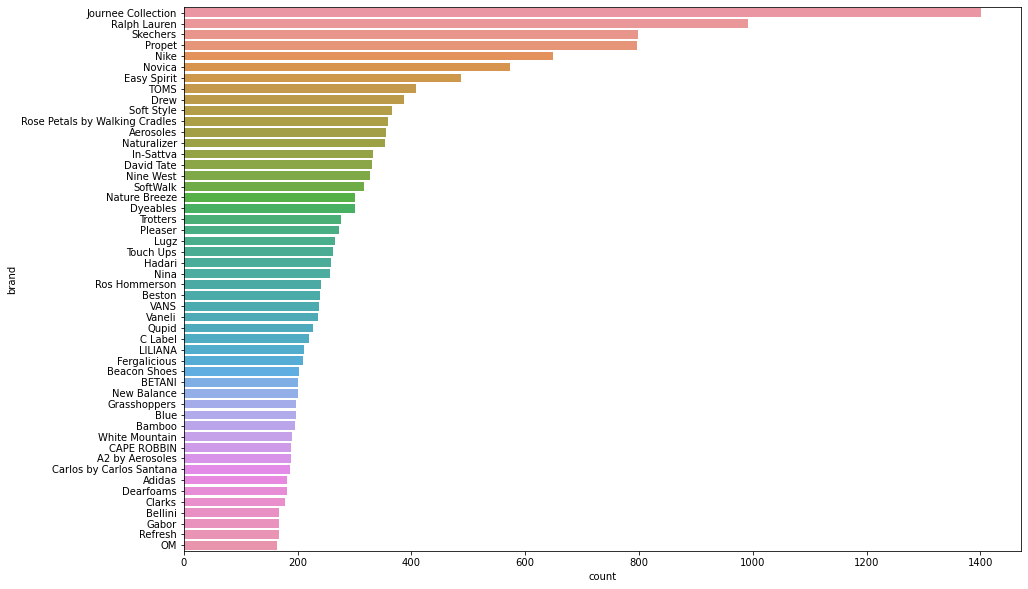

In [46]:
#50 most popular brands

df_freqbrand = df[df['brand'].isin(df['brand'].value_counts()[:50].index.tolist())].sort_values(by=['prices.mean'])

plt.figure(figsize=(15,10))
sns.countplot(data = df_freqbrand, y = 'brand',order=df_freqbrand.groupby('brand')['brand'].count().sort_values(ascending=False).index.tolist())

<AxesSubplot:xlabel='prices.mean', ylabel='brand'>

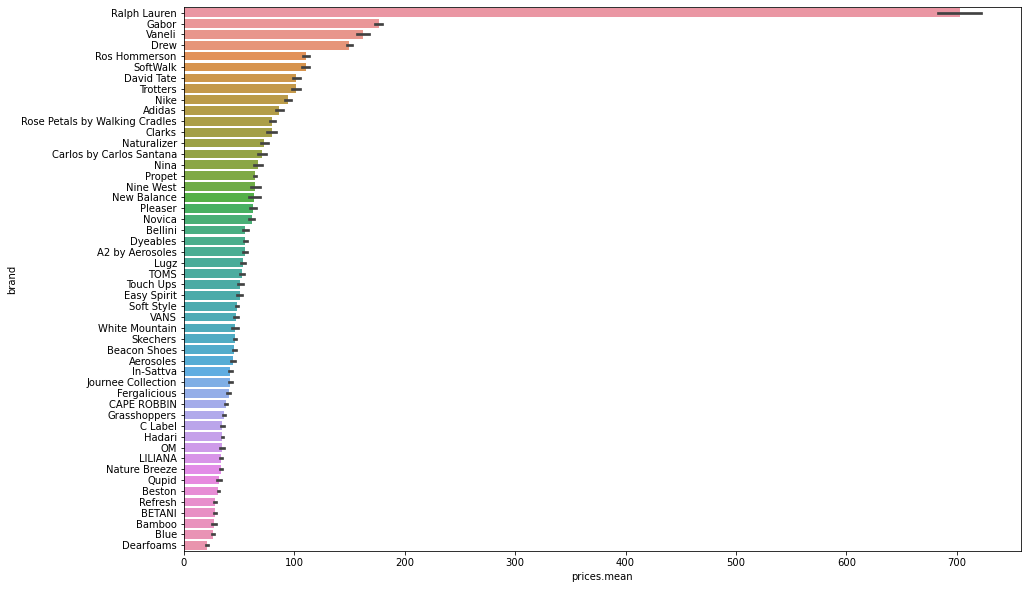

In [115]:
#Price distribution of most popular brands

plt.figure(figsize=(15,10))
sns.barplot(data = df_freqbrand, x='prices.mean', y = 'brand',order=df_freqbrand.groupby('brand')['prices.mean'].mean().sort_values(ascending=False).index.tolist())

#### Price distribution for top 5 counted brand

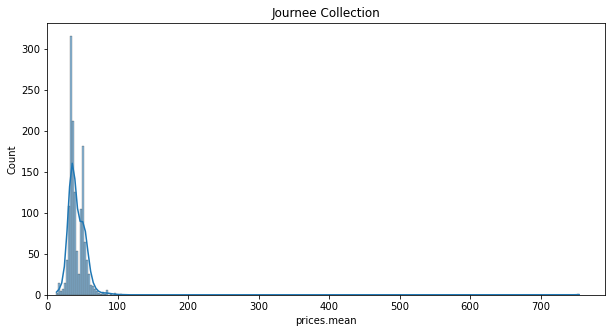

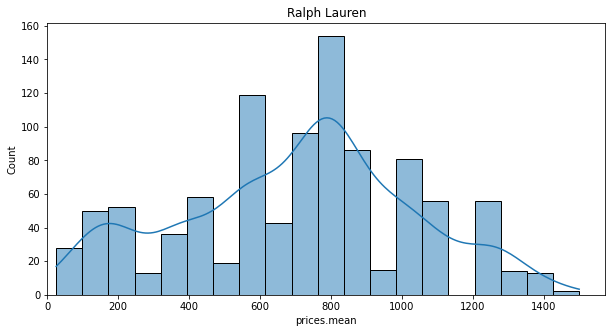

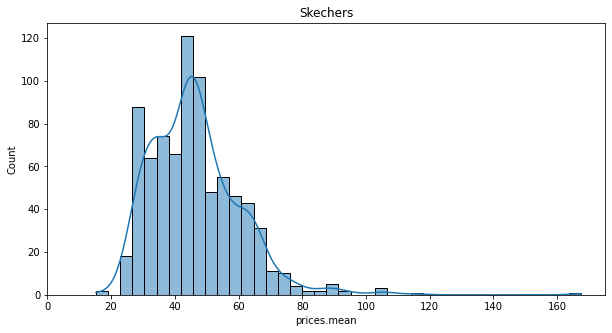

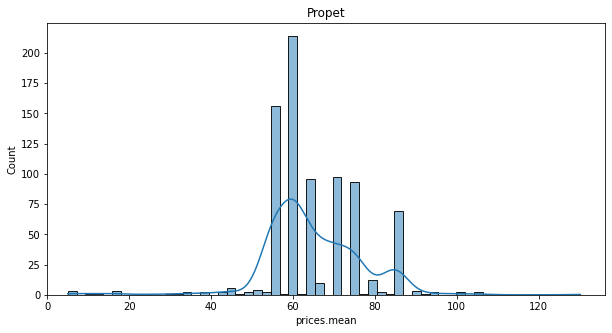

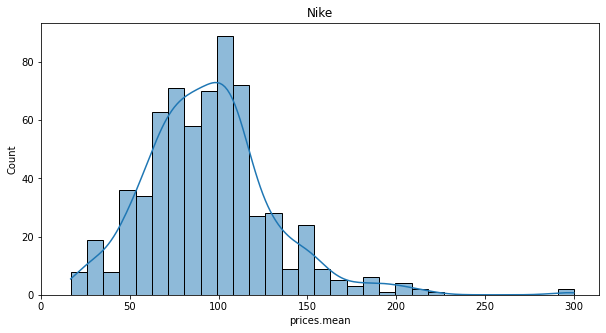

In [73]:
brand_5 = df_freqbrand.groupby('brand')['brand'].count().sort_values(ascending=False).index.tolist()[:5]

for brand in brand_5:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df[df.brand.isin([brand])], x='prices.mean',kde=True)
    plt.xlim(0)
    plt.title(brand)
    plt.show()

A lot of the brand seem to have normal distributions with tails, however Ralph Lauren does stand out as being less skewed than the others.

At the same time Ralph Lauren does seem to be more of a 'luxury brand', as opposed to other brands like Nike or Sketchers which are not 'luxury' brands and cater more towards the lower end of the prices.

In [ ]:
#50 smallest brands

df_freqbrand = df[df['brand'].isin(df['brand'].value_counts()[:50].index.tolist())].sort_values(by=['prices.mean'])

plt.figure(figsize=(15,10))
sns.countplot(data = df_freqbrand, y = 'brand',order=df_freqbrand.groupby('brand')['brand'].count().sort_values(ascending=False).index.tolist())

### Highest Cost Brands

<AxesSubplot:xlabel='prices.mean', ylabel='brand'>

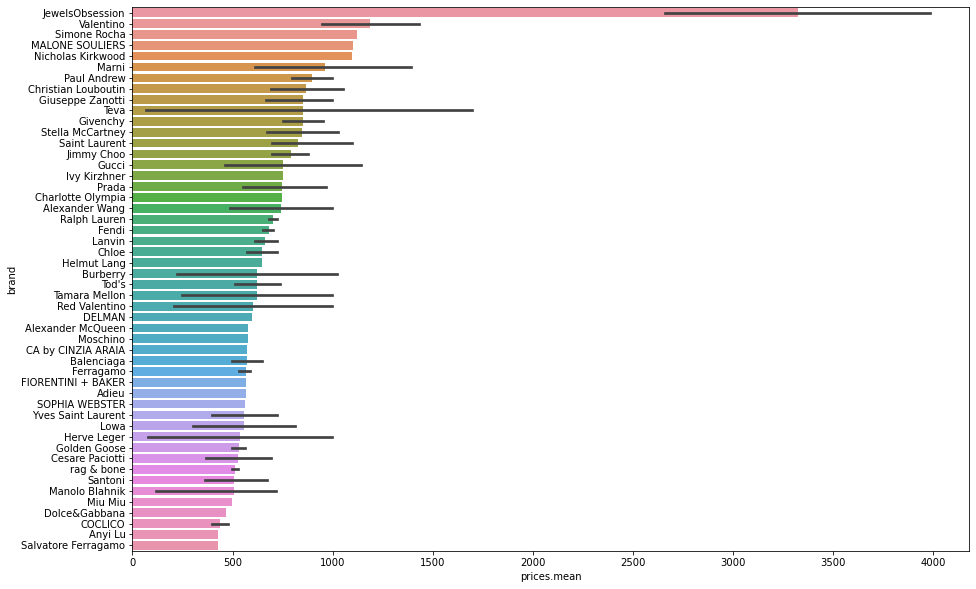

In [112]:
#50 highest cost brands
df_costbrand = df[df['brand'].isin(df.groupby('brand')['prices.mean'].mean().sort_values(ascending=False)[:50].index.tolist())]

plt.figure(figsize=(15,10))
sns.barplot(data = df_costbrand, x = 'prices.mean', y = 'brand',order=df_costbrand.groupby('brand')['prices.mean'].mean().sort_values(ascending=False).index.tolist())

Typically more expensive brands have fewer shoes, and larger deviation between shoe prices. 

#### Price distribution for top 5 mean priced brand

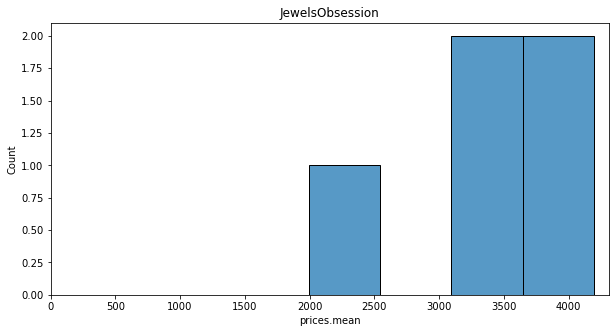

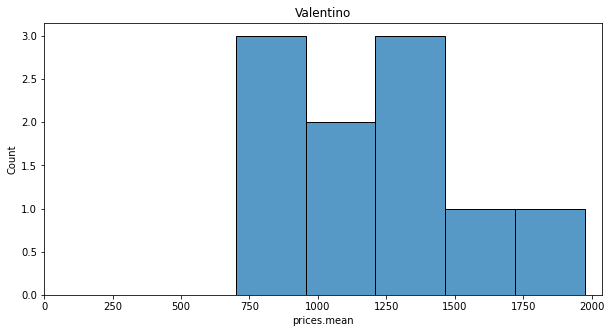

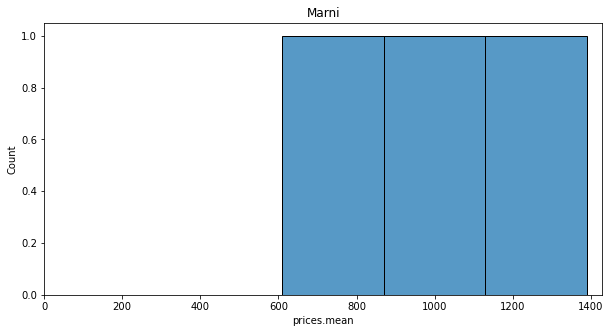

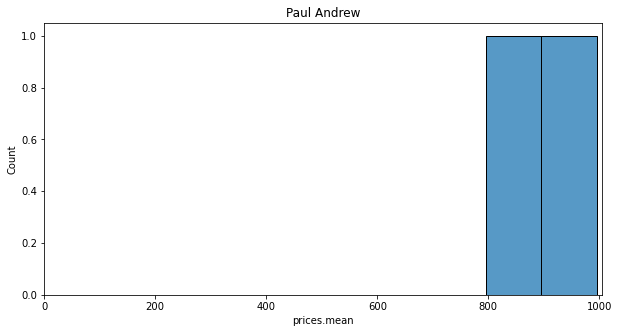

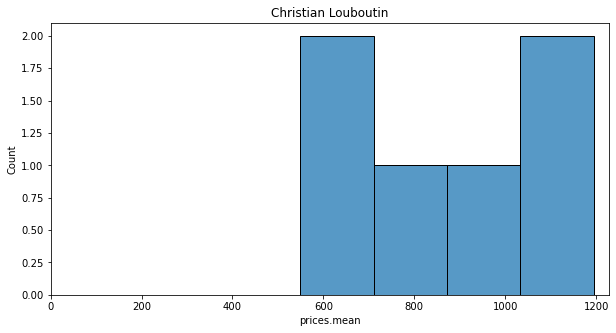

In [123]:
price_5 = ['JewelsObsession','Valentino','Marni','Paul Andrew','Christian Louboutin']

for brand in price_5:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df[df.brand.isin([brand])], x='prices.mean')
    plt.xlim(0)
    plt.title(brand)
    plt.show()

Higher spread of prices seems to be due from just a higher price point driving magnitude of change, and fewer counts of shoes.

In [ ]:
df =

## Most popular colours

<AxesSubplot:xlabel='count', ylabel='colors'>

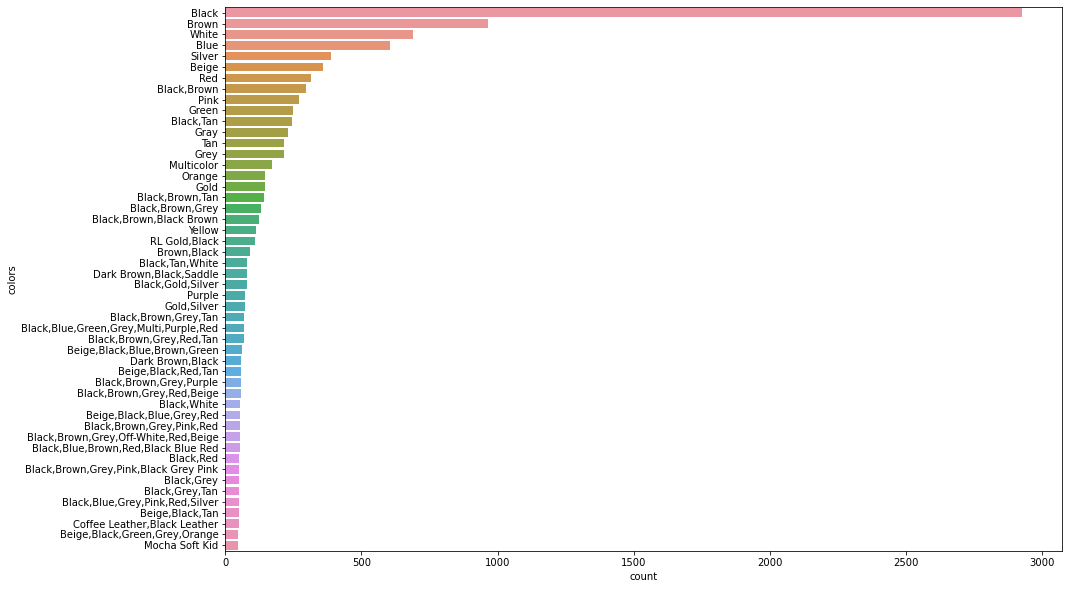

In [76]:
df_freqcolours = df[df['colors'].isin(df['colors'].value_counts()[:50].index.tolist())]

plt.figure(figsize=(15,10))
sns.countplot(data = df_freqcolours, y = 'colors',order=df_freqcolors.groupby('colors')['colors'].count().sort_values(ascending=False).index.tolist())

Black / brown / white are very common compared to the rest of the colours. Note : only around 19,000 counts of colour so some are missing

<AxesSubplot:xlabel='prices.mean', ylabel='colors'>

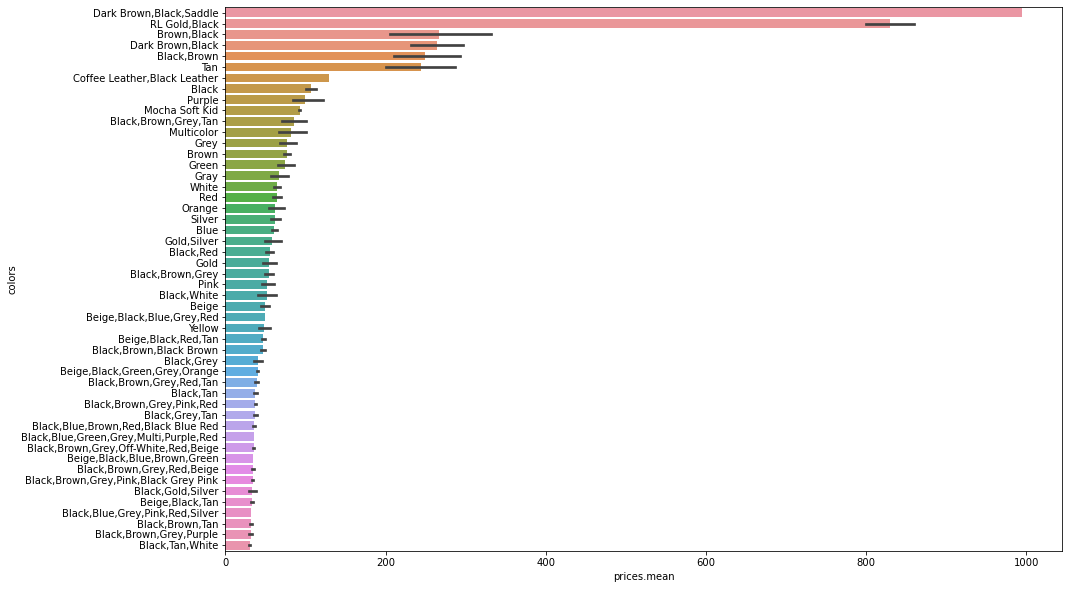

In [77]:
plt.figure(figsize=(15,10))
sns.barplot(data = df_freqcolours,x='prices.mean', y = 'colors',order=df_freqcolors.groupby('colors')['prices.mean'].mean().sort_values(ascending=False).index.tolist())

Lots of the top colours are black / brown / tan, with purple being the only 'extravagant colour' of the bunch. How are these colours reflected in some of the higher / lower tier brands?

#### Price distribution of most popular colours.

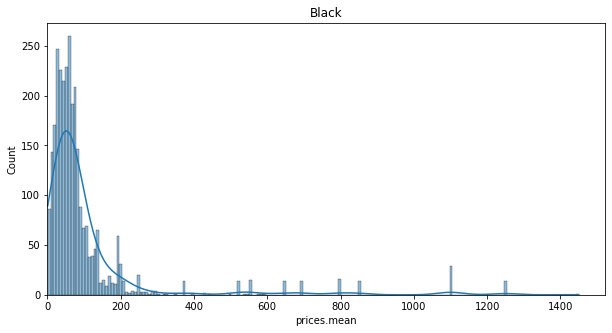

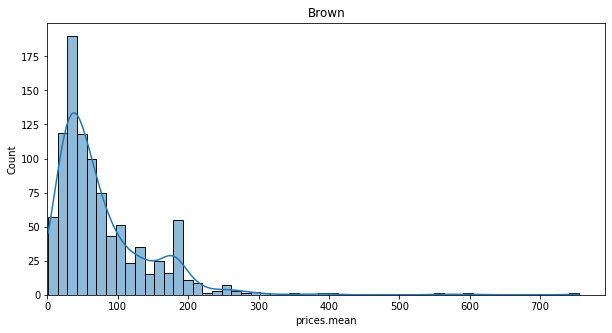

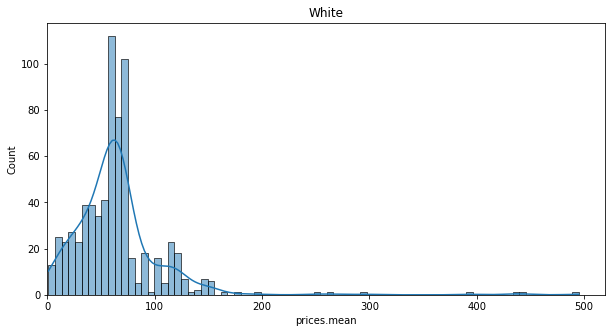

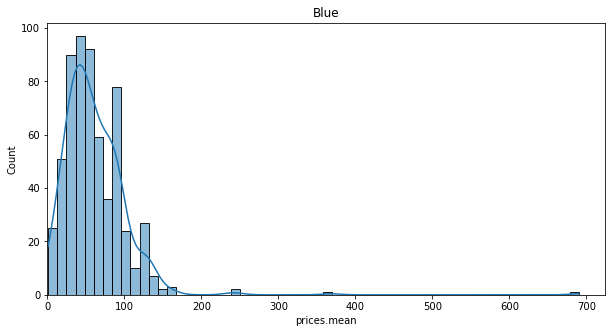

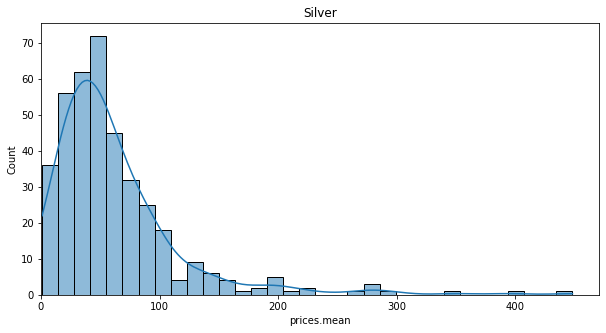

In [80]:
colour_5 = df_freqcolours.groupby('colors')['colors'].count().sort_values(ascending=False).index.tolist()[:5]

for brand in colour_5:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df[df.colors.isin([brand])], x='prices.mean',kde=True)
    plt.xlim(0)
    plt.title(brand)
    plt.show()

Most of these colours show normal distribution with a right tail showing, similar to the non-luxury brands. Most of these colors are anchored in a high number of low cost shoes, and then a few outliers increase the mean value of the price.

## Most expensive colours

<AxesSubplot:xlabel='count', ylabel='colors'>

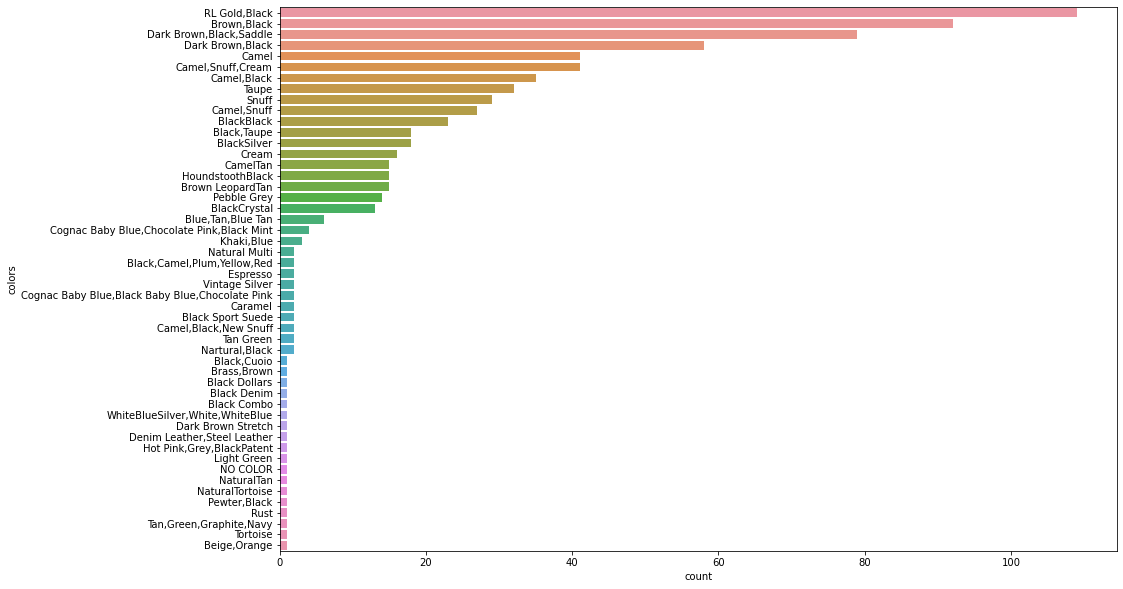

In [126]:
df_costcolours = df[df['colors'].isin(df.groupby('colors')['prices.mean'].mean().sort_values(ascending=False)[:50].index.tolist())]

plt.figure(figsize=(15,10))
sns.countplot(data = df_costcolours, y = 'colors',order=df_costcolours.groupby('colors')['colors'].count().sort_values(ascending=False).index.tolist())

Black / brown / white are very common compared to the rest of the colours. Note : only around 19,000 counts of colour so some are missing

<AxesSubplot:xlabel='prices.mean', ylabel='colors'>

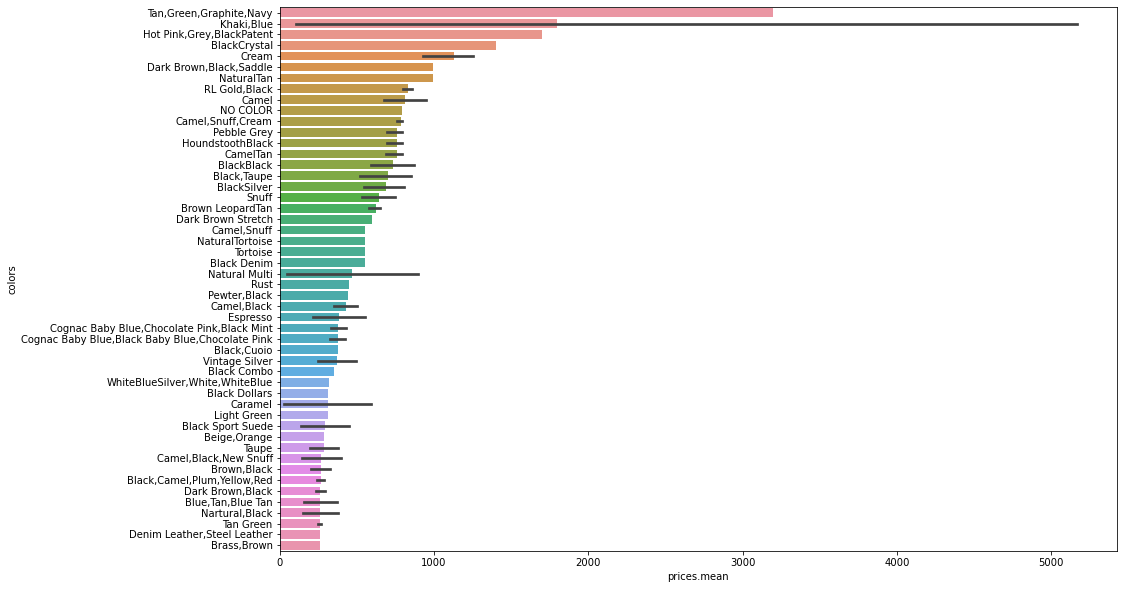

In [127]:
plt.figure(figsize=(15,10))
sns.barplot(data = df_costcolours,x='prices.mean', y = 'colors',order=df_costcolours.groupby('colors')['prices.mean'].mean().sort_values(ascending=False).index.tolist())

Lots of the top colours are black / brown / tan, with purple being the only 'extravagant colour' of the bunch. How are these colours reflected in some of the higher / lower tier brands?

#### Price distribution of most popular colours.

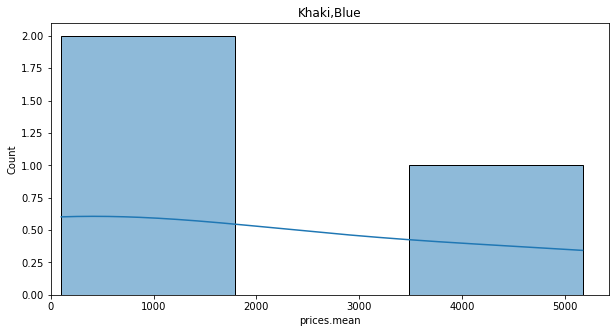

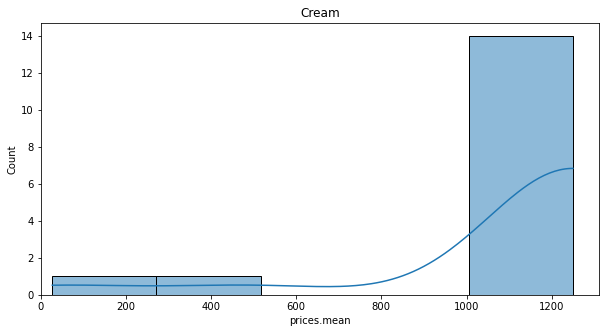

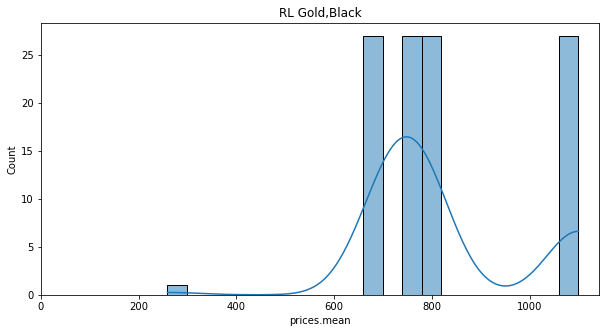

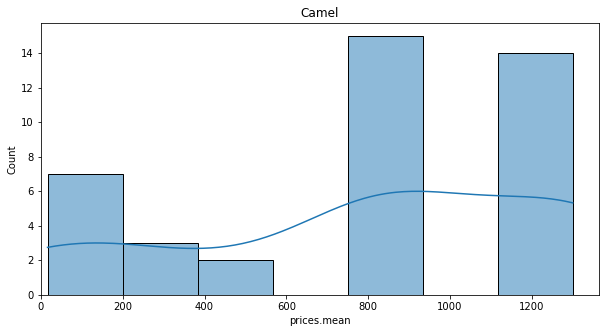

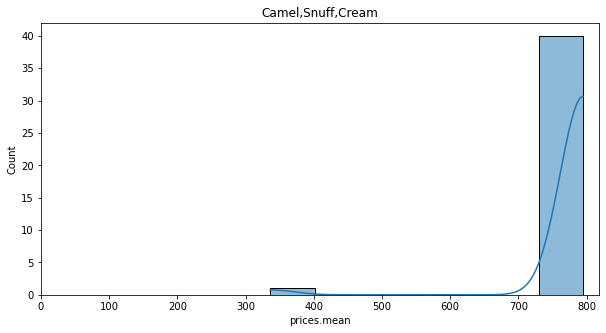

In [129]:
colour_5 = ['Khaki,Blue','Cream','RL Gold,Black','Camel','Camel,Snuff,Cream']

for brand in colour_5:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df[df.colors.isin([brand])], x='prices.mean',kde=True)
    plt.xlim(0)
    plt.title(brand)
    plt.show()

Similar to luxury brands, these high priced colours have high spread due to the few numbers and large magnitude.